# 0. Imports and Settings

In [74]:
%%HTML
<link rel="stylesheet" href="style.css">

In [75]:
# Imports
from fredapi import Fred
from dotenv import load_dotenv
import os
import pandas as pd
import matplotlib.pyplot as plt 
import plotly.express as px
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from scipy.stats import pearsonr

load_dotenv()
API_KEY = os.getenv('API_KEY')
fred = Fred(API_KEY)

# 1. Slides

In [ ]:
<h1> Davide Cossidente </h1>
<h2> Matricola - 166898 </h2>
<html> 
<body>
  <div class="slide">
    <div class="subtitle">Davide Cossidente</div>
    <div class="subtitle">Matricola: 166898</div>
  </div>
  <div class="slide">
    <div class="content">Titolo del Progetto:</div>
    <div class="title">"Analisi dell'Economia Americana"</div>
  </div>
</body>
</html>

#### 1  Correlazione tra: Tasso di Interesse, tasso di disoccupazione e inflazione


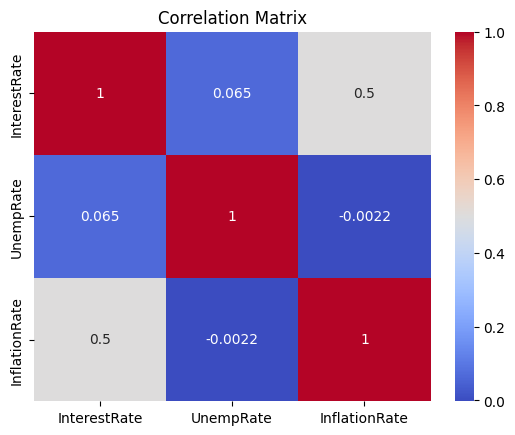

In [76]:
# Retrieving Data
# Interest rate
interestRate = fred.get_series("FEDFUNDS")
# Unemployment Rate (ALL U.S. STATES)
unempRate = fred.get_series("UNRATE")
# Inflation Rate
inflationRate = fred.get_series("CPIAUCSL")

# Merging Series into a DF
data = pd.DataFrame({
    "InterestRate": interestRate,
    "UnempRate": unempRate,
    'InflationRate': inflationRate.pct_change() * 100
}).dropna()

# Plotting the correlation matrix into an heatmap
plt.title('Correlation Matrix')
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.show()

#### 1.1  Correlazione tra: Tasso di Interesse, tasso di disoccupazione e inflazione

<h1>Correlazione tra tasso di Interesse ed Inflazione</h1>

ValueError: 'color' kwarg must be a color or sequence of color specs.  For a sequence of values to be color-mapped, use the 'c' argument instead.

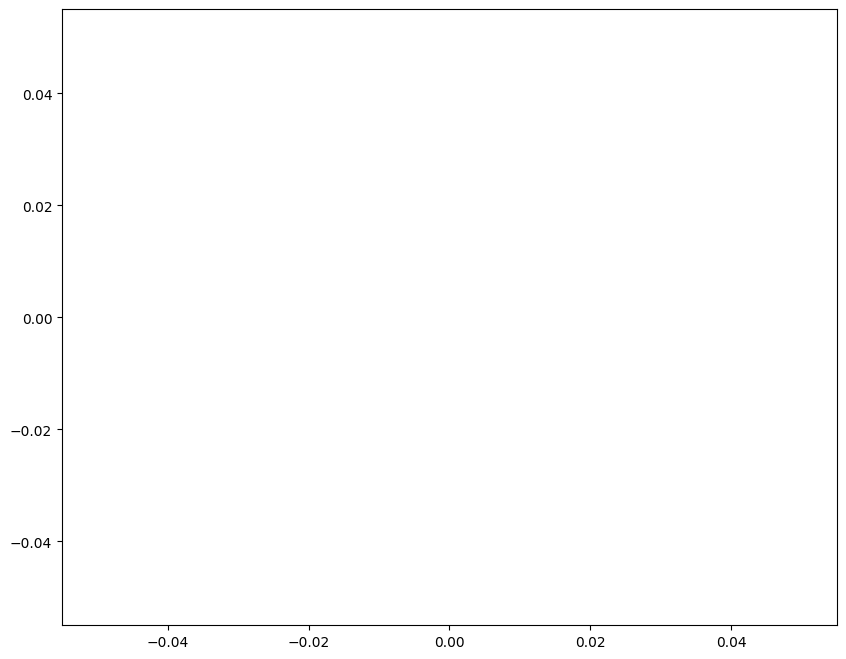

In [77]:

# Grafico di dispersione con linea di regressione
plt.figure(figsize=(10, 8))  # Imposta le dimensioni della figura

# Utilizza seaborn per plottare il grafico di dispersione con la linea di regressione
sns.regplot(x=data['InflationRate'], y=data['InterestRate'], scatter_kws={'alpha':0.5, 'color': ""}, line_kws={"color":"red","alpha":0.7,"lw":2})  

# Aggiungi titolo e label agli assi
plt.title('Relazione tra Inflazione e Tasso di Interesse', fontsize=16)
plt.xlabel('Inflazione', fontsize=14)
plt.ylabel('Tasso di Interesse', fontsize=14)

# Aggiungi una griglia di supporto
plt.grid(True)

# Mostra il grafico
plt.show()


In [ ]:
# Pearson Coefficient between InterestRate and InflationRate
corr, p_value = pearsonr(data['InflationRate'], data['InterestRate'])
print(f'Coefficient di correlazione di Pearson: {corr:.2f}')
print(f'P-value: {p_value:.4f}')

Coefficient di correlazione di Pearson: 0.50
P-value: 0.0000


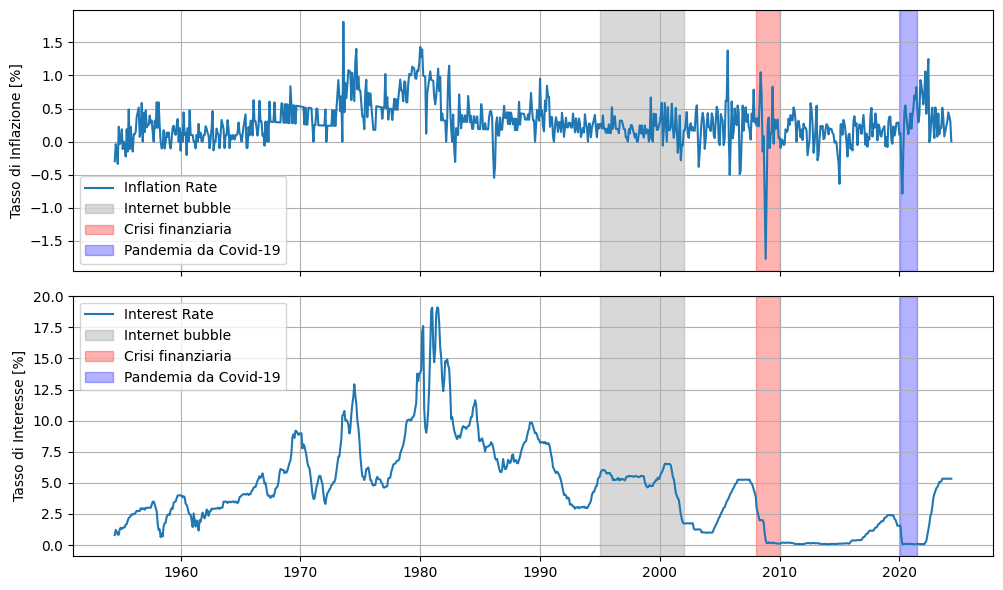

In [ ]:
# Visualization of InflationRate and InterestRate change during years
fig, ax = plt.subplots(2, 1, figsize=(10, 6), sharex=True)
# InflationRate plot
ax[0].plot(data.index, data['InflationRate'], label='Inflation Rate')
#ax[0].set_title('Tasso di Inflazione')
ax[0].axvspan('1995-01-01', '2001-12-31', color='grey', alpha=0.3, label='Internet bubble')
ax[0].axvspan('2008-01-01', '2009-12-31', color='red', alpha=0.3, label='Crisi finanziaria')
ax[0].axvspan('2020-02-01', '2021-06-30', color='blue', alpha=0.3, label='Pandemia da Covid-19')
ax[0].set_ylabel("Tasso di Inflazione [%]")
ax[0].grid()
ax[0].legend()

#InterestRate Plot
ax[1].plot(data.index, data['InterestRate'], label='Interest Rate')
#ax[1].set_title('Tasso di Interesse')
ax[1].axvspan('1995-01-01', '2001-12-31', color='grey', alpha=0.3, label='Internet bubble')
ax[1].axvspan('2008-01-01', '2009-12-31', color='red', alpha=0.3, label='Crisi finanziaria')
ax[1].axvspan('2020-02-01', '2021-06-30', color='blue', alpha=0.3, label='Pandemia da Covid-19')
ax[1].legend()
ax[1].set_ylabel("Tasso di Interesse [%]")
ax[1].grid()
plt.tight_layout()
plt.show()

#### 2. Distribuzione del tasso di disoccupazione per stato